In [7]:
from manim import *
from pathlib import Path
import shutil
import time
import json
import os

params = " -v WARNING -r 200,200 -s  --disable_caching Example"
    
name_snippet_pairs = {}

[09/18/21 14:14:15] WARNING  The parameter number_scale_value of method    ]8;id=1631967255.999176-901391;file:///Users/jan-hendrik/projects/manim/manim/utils/deprecation.py\deprecation.py]8;;\:464
                             NumberLine.__init__ has been deprecated since                   
                             v0.10.0 and is expected to be removed after                     
                             v0.11.0. Use font_size instead.  To convert                     
                             old scale factors to font size, multiply by                     
                             48.

[09/18/21 14:14:16] WARNING  The parameter number_scale_value of method    ]8;id=1631967256.0469398-380554;file:///Users/jan-hendrik/projects/manim/manim/utils/deprecation.py\deprecation.py]8;;\:464
                             NumberLine.__init__ has been deprecated since                   
                             v0.10.0 and is expected to be removed after                     
                             v0.11.0. Use font_size instead.  To convert                     
                             old scale factors to font size, multiply by                     
                             48.

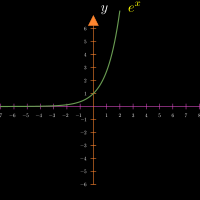

In [9]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        axes  =Axes(x_range=[-8,9,1], y_range=[-6,7,1], x_length=8, y_length=6,
                    axis_config={"include_numbers":True,"numbers_to_exclude":[0], "number_scale_value":0.5},
                    x_axis_config={"color":PINK}, y_axis_config={"color":ORANGE})
        #Argumets passed under axis_config above format the Numberlines acting as axes
        # x_axis_config and y_axis_config can be set up to format two axes differently
        self.add(axes)
        axes_label = axes.get_axis_labels(x_label="x", y_label="y")
        graph = axes.get_graph(lambda x: np.e**x,x_range=[-8,2], color= GREEN_E)
        graph_label = axes.get_graph_label(graph, label="e^x", color=YELLOW)
       
        self.add(graph, graph_label,axes_label)
        self.camera.frame.scale(1/2)


###******        
image_full_name = "AxesXX.png"
snippet = 'mob = Ass("Hello", color=WHITE)'
name_snippet_pairs[image_full_name] = snippet

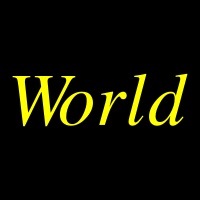

In [10]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Text("World", color=YELLOW,slant=ITALIC)
        self.add(mob)
        self.camera.frame.scale(1/8)
###******       
image_full_name = "XXX.png"
snippet = 'mob = XXX("World", color=YELLOW,slant=ITALIC)'
name_snippet_pairs[image_full_name] = snippet

# Save here!

In [11]:
#pip install ipylab
from ipylab import JupyterFrontEnd

app = JupyterFrontEnd()
app.commands.execute('docmanager:save')

In [12]:
file_name = "Plots"

In [13]:
folder_name = file_name + "_files"
notebook_name = file_name + ".ipynb"
markdown_name = file_name + ".md"
!rm -r $folder_name
!jupyter nbconvert $notebook_name --to markdown
!rm -r $markdown_name
base_directory = Path.cwd() / folder_name
target_directory = Path.cwd() / "imgs"
target_directory.mkdir(parents=True, exist_ok=True)

prefix = file_name # delete files that where created in the past 
for file in target_directory.rglob("*"):
    if (prefix in file.name):
        file.unlink() 

paths = sorted(Path(base_directory).iterdir(), key=os.path.getmtime)
dest_names = list(name_snippet_pairs.keys())
new_keys = []
for num, (p,des) in enumerate(zip(paths,dest_names)):
    to_path = target_directory /  f"{file_name}_{num:03}_{des}"   
    shutil.copy(p,  to_path)
    new_keys.append(to_path.name)
    
new_name_snippet_pairs ={} 
new_values = list(name_snippet_pairs.values())
for key, value in zip(new_keys,new_values):
    if value.startswith("\n"):
        value = value[1:]
    if value.endswith("\n"):
        value = value[:-1]
    new_name_snippet_pairs[key]=value
with open(f'imgs/{file_name}.json', 'w') as fp:
    json.dump(new_name_snippet_pairs, fp,indent=2)
display(new_name_snippet_pairs)
!rm -r $folder_name
!git add .

rm: Plots_files: No such file or directory
[NbConvertApp] Converting notebook Plots.ipynb to markdown
[NbConvertApp] Support files will be in Plots_files/
[NbConvertApp] Making directory Plots_files
[NbConvertApp] Making directory Plots_files
[NbConvertApp] Writing 6994 bytes to Plots.md


{'Plots_000_AxesXX.png': 'mob = Ass("Hello", color=WHITE)',
 'Plots_001_XXX.png': 'mob = XXX("World", color=YELLOW,slant=ITALIC)'}